In [1]:
!pip install colabcode
!pip install fastapi

In [2]:
#importing the required libraries & packages
import pandas as pd
import numpy as np
import time
import argparse
import string
from sklearn.model_selection import train_test_split
from nltk.tokenize import regexp_tokenize
from datetime import datetime
import pytz
from sklearn.utils import shuffle
import pickle

In [3]:
data_frame = pd.read_csv("/content/drive/MyDrive/airline_sentiment_analysis.csv")

In [4]:
data_frame.head()

,Unnamed: 0,airline_sentiment,text
0,1,positive,@VirginAmerica plus you've added commercials t...
1,3,negative,@VirginAmerica it's really aggressive to blast...
2,4,negative,@VirginAmerica and it's a really big bad thing...
3,5,negative,@VirginAmerica seriously would pay $30 a fligh...
4,6,positive,"@VirginAmerica yes, nearly every time I fly VX..."


In [5]:
data_frame = data_frame.drop(['Unnamed: 0'], axis = 1)
data_frame.head()

,airline_sentiment,text
0,positive,@VirginAmerica plus you've added commercials t...
1,negative,@VirginAmerica it's really aggressive to blast...
2,negative,@VirginAmerica and it's a really big bad thing...
3,negative,@VirginAmerica seriously would pay $30 a fligh...
4,positive,"@VirginAmerica yes, nearly every time I fly VX..."


In [6]:
data_frame.head()

,airline_sentiment,text
0,positive,@VirginAmerica plus you've added commercials t...
1,negative,@VirginAmerica it's really aggressive to blast...
2,negative,@VirginAmerica and it's a really big bad thing...
3,negative,@VirginAmerica seriously would pay $30 a fligh...
4,positive,"@VirginAmerica yes, nearly every time I fly VX..."


In [7]:
data_frame = shuffle(data_frame,random_state = 42)
data_frame.head()

,airline_sentiment,text
9193,negative,@USAirways They charged me for a flight they C...
6112,positive,@JetBlue great flight! Great view! :-) http://...
967,negative,"@united they're not, actually. gate agent was ..."
11279,negative,@AmericanAir No worries they called back 4 hrs...
3061,positive,@united thank you. There was one here a few mo...


In [8]:
data_frame = data_frame.reset_index()
data_frame.head()

,index,airline_sentiment,text
0,9193,negative,@USAirways They charged me for a flight they C...
1,6112,positive,@JetBlue great flight! Great view! :-) http://...
2,967,negative,"@united they're not, actually. gate agent was ..."
3,11279,negative,@AmericanAir No worries they called back 4 hrs...
4,3061,positive,@united thank you. There was one here a few mo...


In [9]:
data_frame = data_frame.drop(['index'],axis = 1)
data_frame.head()

,airline_sentiment,text
0,negative,@USAirways They charged me for a flight they C...
1,positive,@JetBlue great flight! Great view! :-) http://...
2,negative,"@united they're not, actually. gate agent was ..."
3,negative,@AmericanAir No worries they called back 4 hrs...
4,positive,@united thank you. There was one here a few mo...


In [10]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11541 entries, 0 to 11540
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  11541 non-null  object
 1   text               11541 non-null  object
dtypes: object(2)
memory usage: 180.5+ KB


In [11]:
data_frame['airline_sentiment'].unique()

array(['negative', 'positive'], dtype=object)

In [12]:
data_frame['airline_sentiment'].describe()

count        11541
unique           2
top       negative
freq          9178
Name: airline_sentiment, dtype: object

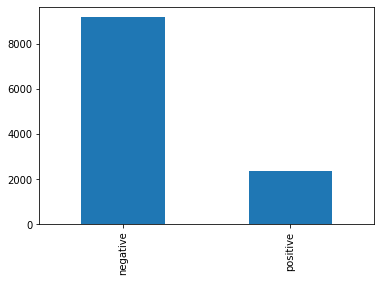

In [13]:
import matplotlib.pyplot as plt

data_frame['airline_sentiment'].value_counts().plot.bar()
plt.show()

In [14]:
#repalcing the categorical values of 'airline_sentiment' to numeric values
data_frame['airline_sentiment'].replace(('positive', 'negative'), (1, 0), inplace=True)
data_frame['airline_sentiment'].value_counts()

0    9178
1    2363
Name: airline_sentiment, dtype: int64

In [15]:
#forming the feature & label variables
data = data_frame['text'].values.tolist()
labels = data_frame['airline_sentiment'].values.tolist()

In [16]:
#First five samples text
data[:5]

['@USAirways They charged me for a flight they Cancelled Flightled, unbelievable and unheard of',
 '@JetBlue great flight! Great view! :-) http://t.co/Yxn00pnOav',
 "@united they're not, actually. gate agent was so rude. now standing in a line waiting for reFlight Booking Problems. missed the only flight to STI. awful.",
 "@AmericanAir No worries they called back 4 hrs Late Flightr while I was asleep and took an additional $200 fee. So by AA standards everything's gr8",
 "@united thank you. There was one here a few months ago, but none now. Weird you don't have a club in one of the busiest airports in the US."]

In [17]:
#first 5 samples label
labels[:5]

[0, 1, 0, 0, 1]

In [18]:
#splitting the data into 80 and 20 split
train_X, test_X, y_train, y_test = train_test_split(data, labels, test_size=0.2, 
                                                    random_state=42, shuffle=True)

print(f'Number of training examples: {len(train_X)}')
print(f'Number of testing examples: {len(test_X)}')

Number of training examples: 9232
Number of testing examples: 2309


**Text Preprocessing**

In [19]:
# Here is a default pattern for tokenization
default_pattern =  r"""(?x)                  
                        (?:[A-Z]\.)+          
                        |\$?\d+(?:\.\d+)?%?    
                        |\w+(?:[-']\w+)*      
                        |\.\.\.               
                        |(?:[.,;"'?():-_`])    
                    """

In [20]:
#funtion for tokenizing the data
def tokenize(text, pattern = default_pattern):
  text = text.lower()
  return regexp_tokenize(text, pattern)

In [21]:
# Tokenize training text into tokens
tokenized_text = []
for i in range(0, len(train_X)):
    tokenized_text.append(tokenize(train_X[i]))

X_train = tokenized_text

# Tokenize testing text into tokens
tokenized_text = []
for i in range(0, len(test_X)):
    tokenized_text.append(tokenize(test_X[i]))

X_test = tokenized_text

In [22]:
#tokenized train & test data
print(X_train[0], X_train[1])
print(X_test[0])

['@', 'usairways', 'been', 'on', 'hold', '2.5', 'hours', 'now', 'system', 'hung', 'up', 'on', 'me', 'twice', 'after', 'an', 'hour', 'holding', '.', ':', '(', 'trying', '2', 'correct', 'online', 'flight', 'booking', 'problems', 'error', '.', 'unhappy'] ['@', 'americanair', 'what', 'is', 'that', '?', 'why', 'even', 'bother', 'catering', 'dog', 'food', 'that', 'no', 'one', 'will', 'eat', '?', 'http', ':', 't', '.', 'co', 'ifespcbztm']
['@', 'americanair', 'can', 'you', 'tell', 'me', 'why', 'all', 'flights', 'from', 'xna', '2', 'dfw', 'are', 'cancelled', 'flightled', 'for', 'tomorrow', 'morning', 'already', '?']


In [23]:
#building dictionary
def createDictionary(data):
  dictionary = dict()
  for sample in  data:
    for token in sample:
      dictionary[token] = dictionary.get(token, 0) + 1
  #sorting the dictionary based on the values
  sorted_dict = sorted(dictionary.items(), key=lambda x: x[1], reverse=True)
  return dict(sorted_dict)

In [24]:
bog = createDictionary(X_train)
#top 10 items in the dictionary
print("Top 10 tokens in the training dictionary:\n")
list(bog.items())[:10]

Top 10 tokens in the training dictionary:



[('.', 10616),
 ('@', 10369),
 ('to', 5633),
 ('the', 4027),
 ('i', 3425),
 ('a', 2967),
 (',', 2837),
 ('united', 2734),
 ('you', 2721),
 ('for', 2719)]

In [25]:
#Navie Bayes Classifier 
class NBClassifier:

    def __init__(self, X_train, y_train, size):
      self.X_train = X_train
      self.y_train = y_train
      self.size = size

    def createDictionary(self):
      """ Function: To create a dictionary of tokens"""
      dictionary = dict()
      for sample in  X_train:
        for token in sample:
          dictionary[token] = dictionary.get(token, 0) + 1
      #sorting the dictionary based on the values
      sorted_dict = sorted(dictionary.items(), key=lambda x: x[1], reverse=True)
      return dict(sorted_dict)
    
    def fit(self):
      """ Function: To compute the count of words in training data dictionary"""
      
      X_train_dict = self.createDictionary()
      if self.size == 'full':
        self.words_list = list(X_train_dict.keys())
        self.words_count = dict.fromkeys(self.words_list, None)
      else:
        self.words_list = list(X_train_dict.keys())[:int(self.size)]
        self.words_count = dict.fromkeys(self.words_list, None)
            
      #DataFrame of training data
      train = pd.DataFrame(columns = ['X_train', 'y_train'])
      train['X_train'] = X_train
      train['y_train'] = y_train

      train_0 = train.copy()[train['y_train'] == 0]
      train_1 = train.copy()[train['y_train'] == 1]
      train_2 = train.copy()[train['y_train'] == 2]

      #computing the prior of each class
      Pr0 = train_0.shape[0]/train.shape[0]
      Pr1 = train_1.shape[0]/train.shape[0]
      Pr2 = train_2.shape[0]/train.shape[0]
      
      self.Prior = np.array([Pr0, Pr1, Pr2])
        
      #converting list of lists into a list
      def flatList(listOfList):
        flatten = []
        for elem in listOfList:
          flatten.extend(elem)
        return flatten
  
      #Creating the data list for each class - tokens of each class
      X_train_0 = flatList(train[train['y_train'] == 0]['X_train'].tolist())
      X_train_1 = flatList(train[train['y_train'] == 1]['X_train'].tolist())
      X_train_2 = flatList(train[train['y_train'] == 2]['X_train'].tolist())
    
      self.X_train_len = np.array([len(X_train_0), len(X_train_1), len(X_train_2)])

      for token in self.words_list:
        #list to store three word counts of a token
        res = []

        #inserting count of token in class 0: Neutral
        res.insert(0, X_train_0.count(token))

        #inserting count of token in class 1: Positive
        res.insert(1, X_train_1.count(token))

          #inserting count of token in class 2: Negative
        res.insert(2, X_train_2.count(token))

        #assigning the count list to its token in the dictionary 
        self.words_count[token] = res
      return self

    def predict(self, X_test):
      """ Function: Predicts the label of the data"""     
      pred = []
      for sample in X_test:
        mul = np.array([1,1,1])
        for tokens in sample:
          vocab_count = len(self.words_list)
          if tokens in self.words_list:
            prob = ((np.array(self.words_count[tokens])+1) / (self.X_train_len + vocab_count))
          #except:
            #prob = ((np.array([0,0,0])+1) / (self.X_train_len + vocab_count))
          mul = mul * prob
        val = mul * self.Prior
        pred.append(np.argmax(val))
      return pred
    
    def score(self, pred, labels):
      """ Function: To compute the perfoemance of the model"""
      correct = (np.array(pred) == np.array(labels)).sum()
      accuracy = correct/len(pred)
      return correct, accuracy

In [26]:
# Creating holders to store the model performance results
attributes = []
corr = []
acc = []

#function to call for storing the results
def storeResults(attr, cor,ac):
  attributes.append(attr)
  corr.append(round(cor, 3))
  acc.append(round(ac, 3))

In [27]:
#training the classifier     
nb = NBClassifier(X_train, y_train, 'full')  
nb.fit()

y_pred = nb.predict(X_test)

print("NBClassifier Model miss any prediction???", len(X_test) != len(y_pred))

NBClassifier Model miss any prediction??? False


In [28]:
#Performance of the classifier
cor1, acc1 = nb.score(y_pred, y_test)
print("Count of Correct Predictions:", cor1)
print("Accuracy of the model: %i / %i = %.4f " %(cor1, len(y_pred), acc1))

Count of Correct Predictions: 2108
Accuracy of the model: 2108 / 2309 = 0.9129 


In [29]:
storeResults('Unprocessed Data', cor1, acc1)

**Further Processing Text Data**

In [30]:
#string of punctiations
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [31]:
#Removing the punctuation
def removePunctuation(data):
    update = []
    for sample in data:
        #removing punctuation from the tokens
        re_punct = [''.join(char for char in word if char not in string.punctuation) for word in sample]
        #removes the empty strings
        re_punct = [word for word in re_punct if word]
       
        update.append(re_punct)
    return update

In [32]:
#Removing punctuation from training data text tokens  
X_train_P = removePunctuation(X_train)

#Removing punctuation from testing data text tokens
X_test_P = removePunctuation(X_test)

#train & test data after removing punctuation
print(X_train_P[0])
print(X_test_P[0])

['usairways', 'been', 'on', 'hold', '25', 'hours', 'now', 'system', 'hung', 'up', 'on', 'me', 'twice', 'after', 'an', 'hour', 'holding', 'trying', '2', 'correct', 'online', 'flight', 'booking', 'problems', 'error', 'unhappy']
['americanair', 'can', 'you', 'tell', 'me', 'why', 'all', 'flights', 'from', 'xna', '2', 'dfw', 'are', 'cancelled', 'flightled', 'for', 'tomorrow', 'morning', 'already']


In [33]:
#training the classifier     
nb_punct = NBClassifier(X_train_P, y_train, 'full')
nb_punct.fit()

y_pred_P = nb_punct.predict(X_test_P)

print("NBClassifier Model miss any prediction???", len(X_test) != len(y_pred_P))

NBClassifier Model miss any prediction??? False


In [34]:
#Performance of the classifier
cor2, acc2 = nb_punct.score(y_pred_P, y_test)
print("Count of Correct Predictions:", cor2)
print("Accuracy of the model: %i / %i = %.4f " %(cor2, len(y_pred_P), acc2))

Count of Correct Predictions: 2104
Accuracy of the model: 2104 / 2309 = 0.9112 


In [35]:
storeResults('No Punctuation Data', cor2, acc2)

In [36]:
def removeStopWords(data):
    update = []
    stopwords = ['the', 'at','i', 'of', 'us', 'have', 'a', 'you','ours', 'themselves', 
                 'that', 'this', 'be', 'is', 'for']
    for sample in data:
        #removing stopwords from tokenized data
        re_stop = [word for word in sample if word not in stopwords]
        
        update.append(re_stop)
    return update

In [37]:
#Removing stopwords from training data text tokens  
X_train_S = removeStopWords(X_train)

#Removing stopwords from testing data text tokens
X_test_S = removeStopWords(X_test)

#train & test data after removing stopwords
print(X_train_S[0])
print(X_test_S[0])

['@', 'usairways', 'been', 'on', 'hold', '2.5', 'hours', 'now', 'system', 'hung', 'up', 'on', 'me', 'twice', 'after', 'an', 'hour', 'holding', '.', ':', '(', 'trying', '2', 'correct', 'online', 'flight', 'booking', 'problems', 'error', '.', 'unhappy']
['@', 'americanair', 'can', 'tell', 'me', 'why', 'all', 'flights', 'from', 'xna', '2', 'dfw', 'are', 'cancelled', 'flightled', 'tomorrow', 'morning', 'already', '?']


In [38]:
#training the classifier     
nb_stop = NBClassifier(X_train_S, y_train, 'full')
nb_stop.fit()

y_pred_S = nb_stop.predict(X_test_S)

print("NBClassifier Model miss any prediction???", len(X_test) != len(y_pred_S))

NBClassifier Model miss any prediction??? False


In [39]:
#Performance of the classifier
cor3, acc3 = nb_stop.score(y_pred_S, y_test)
print("Count of Correct Predictions:", cor3)
print("Accuracy of the model: %i / %i = %.4f " %(cor3, len(y_pred_S), acc3))

Count of Correct Predictions: 2116
Accuracy of the model: 2116 / 2309 = 0.9164 


In [40]:
storeResults('Removed few Stopwords', cor3, acc3)

In [41]:
#Removing stopwords from training data text tokens  
X_train_PS = removeStopWords(X_train_P)

#Removing stopwords from testing data text tokens
X_test_PS = removeStopWords(X_test_P)

#train & test data after removing stopwords
print(X_train_PS[0])
print(X_test_PS[0])

['usairways', 'been', 'on', 'hold', '25', 'hours', 'now', 'system', 'hung', 'up', 'on', 'me', 'twice', 'after', 'an', 'hour', 'holding', 'trying', '2', 'correct', 'online', 'flight', 'booking', 'problems', 'error', 'unhappy']
['americanair', 'can', 'tell', 'me', 'why', 'all', 'flights', 'from', 'xna', '2', 'dfw', 'are', 'cancelled', 'flightled', 'tomorrow', 'morning', 'already']


In [42]:
#training the classifier     
nb_PS = NBClassifier(X_train_PS, y_train, 'full')
nb_PS.fit()

y_pred_PS = nb_PS.predict(X_test_PS)

print("NBClassifier Model miss any prediction???", len(X_test) != len(y_pred_PS))

NBClassifier Model miss any prediction??? False


In [43]:
#Performance of the classifier
cor4, acc4 = nb_PS.score(y_pred_PS, y_test)
print("Count of Correct Predictions:", cor4)
print("Accuracy of the model: %i / %i = %.4f " %(cor4, len(y_pred_PS), acc4))

Count of Correct Predictions: 2102
Accuracy of the model: 2102 / 2309 = 0.9104 


In [44]:
storeResults('Removed both Punctuation & Few Stopwords', cor4, acc4)

In [45]:
#total tokens in training dictionary
print('Total tokens in the dictionary:', len(bog))

Total tokens in the dictionary: 11400


**Considering Top 5k Tokens**

In [46]:
#training the classifier - 5000 tokens 
nb_5k = NBClassifier(X_train, y_train, '5000')
nb_5k.fit()

y_pred_5k = nb_5k.predict(X_test)

print("NBClassifier Model miss any prediction???", len(X_test) != len(y_pred_5k))

NBClassifier Model miss any prediction??? False


In [47]:
#Performance of the classifier
cor5, acc5 = nb_5k.score(y_pred_5k, y_test)
print("Count of Correct Predictions:", cor5)
print("Accuracy of the model: %i / %i = %.4f " %(cor5, len(y_pred), acc5))

Count of Correct Predictions: 2111
Accuracy of the model: 2111 / 2309 = 0.9142 


In [48]:
storeResults('5k Tokens of Voab - Unprocessed Data', cor5, acc5)

**5k Tokens of Vocabulary - No Punctuation Data**

In [49]:
#training the classifier - 5000 tokens 
nb_5k_P = NBClassifier(X_train_P, y_train, '5000')
nb_5k_P.fit()

y_pred_5k_P = nb_5k_P.predict(X_test_P)

print("NBClassifier Model miss any prediction???", len(X_test) != len(y_pred_5k_P))

NBClassifier Model miss any prediction??? False


In [50]:
#Performance of the classifier
cor6, acc6 = nb_5k.score(y_pred_5k_P, y_test)
print("Count of Correct Predictions:", cor6)
print("Accuracy of the model: %i / %i = %.4f " %(cor6, len(y_pred), acc6))

Count of Correct Predictions: 2104
Accuracy of the model: 2104 / 2309 = 0.9112 


In [51]:
storeResults('5k Tokens of Voab - No Punctuation Data', cor6, acc6)

**5k Tokens of Vocabulary - Removed few Stopwords**




In [52]:
#training the classifier - 5000 tokens 
nb_5k_S = NBClassifier(X_train_S, y_train, '5000')
nb_5k_S.fit()

y_pred_5k_S = nb_5k_S.predict(X_test_S)

print("NBClassifier Model miss any prediction???", len(X_test) != len(y_pred_5k_S))

NBClassifier Model miss any prediction??? False


In [53]:
#Performance of the classifier
cor7, acc7 = nb_5k_S.score(y_pred_5k_S, y_test)
print("Count of Correct Predictions:", cor7)
print("Accuracy of the model: %i / %i = %.4f " %(cor7, len(y_pred), acc7))

Count of Correct Predictions: 2121
Accuracy of the model: 2121 / 2309 = 0.9186 


In [54]:
storeResults('5k Tokens of Voab - Removed few Stopwords', cor7, acc7)

**5k Tokens of Vocabulary - Removed both Punctuation & Few Stopwords**




In [55]:
#training the classifier - 5000 tokens 
nb_5k_PS = NBClassifier(X_train_PS, y_train, '5000')
nb_5k_PS.fit()

y_pred_5k_PS = nb_5k_PS.predict(X_test_PS)

print("NBClassifier Model miss any prediction???", len(X_test) != len(y_pred_5k_PS))

NBClassifier Model miss any prediction??? False


In [56]:
#Performance of the classifier
cor8, acc8 = nb_5k_PS.score(y_pred_5k_PS, y_test)
print("Count of Correct Predictions:", cor8)
print("Accuracy of the model: %i / %i = %.4f " %(cor8, len(y_pred), acc8))

Count of Correct Predictions: 2112
Accuracy of the model: 2112 / 2309 = 0.9147 


In [57]:
storeResults('5k Tokens of Voab - Removed both Punctuation & Few Stopwords', cor8, acc8)

**Considering Top 10k Tokens**

In [58]:
#training the classifier - 5000 tokens 
nb_10k = NBClassifier(X_train, y_train, '5000')
nb_10k.fit()

y_pred_10k = nb_10k.predict(X_test)

print("NBClassifier Model miss any prediction???", len(X_test) != len(y_pred_10k))

NBClassifier Model miss any prediction??? False


In [59]:
#Performance of the classifier
cor9, acc9 = nb_10k.score(y_pred_10k, y_test)
print("Count of Correct Predictions:", cor9)
print("Accuracy of the model: %i / %i = %.4f " %(cor9, len(y_pred), acc9))

Count of Correct Predictions: 2111
Accuracy of the model: 2111 / 2309 = 0.9142 


In [60]:
storeResults('10k Tokens of Voab - Unprocessed Data', cor9, acc9)

**10k Tokens of Vocabulary - No Punctuation Data**

In [61]:
#training the classifier - 10000 tokens 
nb_10k_P = NBClassifier(X_train_P, y_train, '10000')
nb_10k_P.fit()

y_pred_10k_P = nb_10k_P.predict(X_test_P)
  
print("NBClassifier Model miss any prediction???", len(X_test) != len(y_pred_10k_P))

NBClassifier Model miss any prediction??? False


In [62]:
#Performance of the classifier
cor10, acc10 = nb_10k_P.score(y_pred_10k_P, y_test)
print("Count of Correct Predictions:", cor10)
print("Accuracy of the model: %i / %i = %.4f " %(cor10, len(y_pred), acc10))

Count of Correct Predictions: 2109
Accuracy of the model: 2109 / 2309 = 0.9134 


In [63]:
storeResults('10k Tokens of Voab - No Punctuation Data', cor10, acc10)

**10k Tokens of Vocabulary - Removed few Stopwords**




In [64]:
#training the classifier - 10000 tokens 
nb_10k_S = NBClassifier(X_train_S, y_train, '10000')
nb_10k_S.fit()

y_pred_10k_S = nb_10k_S.predict(X_test_S)
  
print("NBClassifier Model miss any Srediction???", len(X_test) != len(y_pred_10k_S))

NBClassifier Model miss any Srediction??? False


In [65]:
#Performance of the classifier
cor11, acc11 = nb_10k_S.score(y_pred_10k_S, y_test)
print("Count of Correct Predictions:", cor11)
print("Accuracy of the model: %i / %i = %.4f " %(cor11, len(y_pred), acc11))

Count of Correct Predictions: 2112
Accuracy of the model: 2112 / 2309 = 0.9147 


In [66]:
storeResults('10k Tokens of Voab - Removed few Stopwords', cor11, acc11)

**10k Tokens of Vocabulary - Removed both Punctuation & Few Stopwords**




In [67]:
#training the classifier - 10000 tokenPS 
nb_10k_PS = NBClassifier(X_train_PS, y_train, '10000')
nb_10k_PS.fit()

y_pred_10k_PS = nb_10k_PS.predict(X_test_PS)

print("NBClaPSPSifier Model miSS any PSrediction???", len(X_test) != len(y_pred_10k_PS))

NBClaPSPSifier Model miSS any PSrediction??? False


In [68]:
#Performance of the classifier
cor12, acc12 = nb_10k_PS.score(y_pred_10k_PS, y_test)
print("Count of Correct Predictions:", cor12)
print("Accuracy of the model: %i / %i = %.4f " %(cor12, len(y_pred), acc12))

Count of Correct Predictions: 2102
Accuracy of the model: 2102 / 2309 = 0.9104 


In [69]:
storeResults('10k Tokens of Voab - Removed both Punctuation & Few Stopwords', cor12, acc12)

### **10. Comparing the Results**

In [70]:
results = pd.DataFrame({ 'Data Modification': attributes,    
    'Correct Predictions': corr,
    'Model Accuracy': acc})

In [71]:
results.sort_values(by=['Model Accuracy', 'Correct Predictions'], ascending=False)

,Data Modification,Correct Predictions,Model Accuracy
6,5k Tokens of Voab - Removed few Stopwords,2121,0.919
2,Removed few Stopwords,2116,0.916
7,5k Tokens of Voab - Removed both Punctuation &...,2112,0.915
10,10k Tokens of Voab - Removed few Stopwords,2112,0.915
4,5k Tokens of Voab - Unprocessed Data,2111,0.914
8,10k Tokens of Voab - Unprocessed Data,2111,0.914
9,10k Tokens of Voab - No Punctuation Data,2109,0.913
0,Unprocessed Data,2108,0.913
1,No Punctuation Data,2104,0.911
5,5k Tokens of Voab - No Punctuation Data,2104,0.911


**Developing API server using Fast API and Swagger UI**

In [72]:
#Saving the model
Pkl_Filename = "Naive_Bayes.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(nb, file)

In [73]:
from pydantic import BaseModel

class Text(BaseModel):
    english_text:list
    
    class Config:
        schema_extra = {
            "example": {
                "english_text": ["This is the worst flight for traveling"]
            }
        }

In [74]:
from fastapi import FastAPI
import pickle

app = FastAPI()

@app.on_event("startup")
def load_model():
    global model
    model = pickle.load(open("Naive_Bayes.pkl", "rb"))

@app.get('/')
def index():
    return {'message': 'This is the homepage of the API '}

@app.post('/predict')
def get_sentiment(data:Text):
    received = data.dict()
    text = received['english_text']
    tokenized_text = []
    for i in range(0, len(text)):
        tokenized_text.append(tokenize(text[i]))
    text = tokenized_text
    text = removePunctuation(text)
    text = removeStopWords(text)
    
    pred_category = model.predict(text)
    if pred_category[0] == 1:
      pred = "positive"
    else:
        pred = "negative"
        
    return {'prediction': pred}

In [75]:
from colabcode import ColabCode
server = ColabCode(port=10000, code=False)

In [ ]:
server.run_app(app=app)

Public URL: NgrokTunnel: "https://71ee23c09626.ngrok.io" -> "http://localhost:10000"
